In [1]:
import duckdb
import pandas as pd


%load_ext sql

In [2]:
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

In [3]:
%sql duckdb:///:default:

In [4]:
%sql SELECT 'Off and flying!' as  a_duckdb_column

,a_duckdb_column
0,Off and flying!


In [5]:
%%sql
select
    schema_name,
    function_name
from duckdb_functions()
order by all desc
limit 10

,schema_name,function_name
0,pg_catalog,shobj_description
1,pg_catalog,shobj_description
2,pg_catalog,shobj_description
3,pg_catalog,pg_typeof
4,pg_catalog,pg_typeof
5,pg_catalog,pg_typeof
6,pg_catalog,pg_type_is_visible
7,pg_catalog,pg_type_is_visible
8,pg_catalog,pg_type_is_visible
9,pg_catalog,pg_ts_template_is_visible


In [6]:
%sql my_df << SELECT 'Off and Flying' as a_duckdb_column

In [7]:
my_df

,a_duckdb_column
0,Off and Flying


In [8]:
input_df = pd.DataFrame.from_dict({"i":[1, 2, 3], "j":["one", "two", "three"]})

In [9]:
%sql output_df << SELECT sum(i) AS total_i FROM input_df

In [10]:
output_df

,total_i
0,6.0


In [12]:
%%sql
INSTALL httpfs;
LOAD httpfs;

,Success


In [40]:
%%sql --save short_trips --no-execute
SELECT *
FROM "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet"

Skipping execution...

In [41]:
%sql short_trips << select * from short_trips where trip_distance < 6.3

Generating CTE with stored snippets: 'short_trips'

(array([273719., 446019., 248842., 126359.,  68953.,  40446.,  27775.]),
 array([0.        , 0.89857143, 1.79714286, 2.69571429, 3.59428571,
        4.49285714, 5.39142857, 6.29      ]),
 <BarContainer object of 7 artists>)

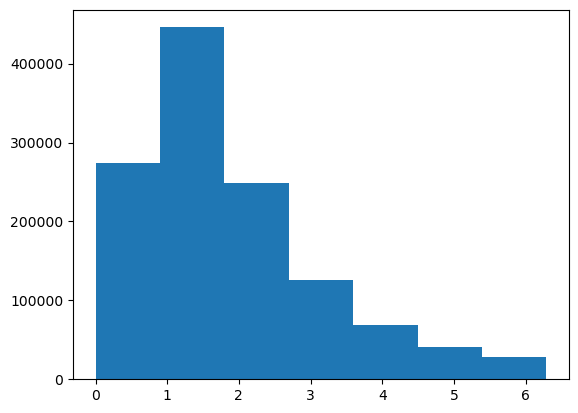

In [42]:
import matplotlib.pyplot as plt

plt.hist(short_trips['trip_distance'], bins=7)

In [50]:
%%sql
CREATE TABLE corpus AS
  SELECT * FROM read_parquet(
    'https://github.com/marhar/duckdb_tools/raw/main/full-text-shakespeare/shakespeare.parquet');

RuntimeError: (duckdb.CatalogException) Catalog Error: Table with name "corpus" already exists!
[SQL: CREATE TABLE corpus AS
  SELECT * FROM read_parquet(
    'https://github.com/marhar/duckdb_tools/raw/main/full-text-shakespeare/shakespeare.parquet');]
(Background on this error at: https://sqlalche.me/e/14/f405)
If you need help solving this issue, send us a message: https://ploomber.io/community


In [51]:
%%sql
DESCRIBE corpus;

,column_name,column_type,null,key,default,extra


In [53]:
%%sql
INSTALL fts;
LOAD fts;
PRAGMA create_fts_index('corpus', 'line_id', 'text_entry');

,Count


In [54]:
%%sql
SELECT fts_main_corpus.match_bm25(line_id, 'butter') AS score,
    line_id, play_name, speaker, text_entry
  FROM corpus
  WHERE score IS NOT NULL
  ORDER BY score;

,score,line_id,play_name,speaker,text_entry
0,2.739219,H4/2.4.115,Henry IV,PRINCE HENRY,Didst thou never see Titan kiss a dish of butter?
1,3.027841,AWW/5.2.9,Alls well that ends well,Clown,henceforth eat no fish of fortunes buttering.
2,3.027841,MWW/2.2.260,Merry Wives of Windsor,FALSTAFF,"Hang him, mechanical salt-butter rogue! I will"
3,3.027841,MWW/2.2.284,Merry Wives of Windsor,FORD,"rather trust a Fleming with my butter, Parson ..."
4,3.027841,MWW/3.5.7,Merry Wives of Windsor,FALSTAFF,"Ill have my brains taen out and buttered, and ..."
5,3.027841,MWW/3.5.102,Merry Wives of Windsor,FALSTAFF,to heat as butter; a man of continual dissolution
6,3.384449,H4/4.2.21,Henry IV,FALSTAFF,"toasts-and-butter, with hearts in their bellie..."
7,3.384449,H4/4.2.62,Henry IV,PRINCE HENRY,"already made thee butter. But tell me, Jack, w..."
8,3.384449,AWW/4.1.40,Alls well that ends well,PAROLLES,butter-womans mouth and buy myself another of
9,3.384449,AYLI/3.2.93,As you like it,TOUCHSTONE,right butter-womens rank to market.
